In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import HTML, display
import ipywidgets

In [2]:
def make_gaussian(mu, sigma):
    
    # This function generates a gaussian distribution from a mean (mu) and standard deviation (sigma)
    # mu = mean
    # sigma = std deviation
    
    x = np.linspace(mu-4*sigma,mu+4*sigma,100)
    gauss = [(1 / sigma / np.sqrt(2*np.pi)) * np.exp(-0.5 * ((xx - mu)/sigma)**2) for xx in x]
    
    return gauss, x

The following figures were generated by characterizing August streamflow data [$m^3 s^{-1}$] throughout Alberta:

<table><tr><td><img src='std_vs_mean.png' width=350 ></td><td><img src='streamflow_clusters.png' width=400></td></tr></table>

Where $PC_1$ correlates with mean August flow, and $\sigma_{PC1}$ indicates the year-to-year variability of $PC_1$.  Cluster 3 is made up primarily of glacier-fed rivers which are sourced in the glaciated region of the Rocky Mountains.  In a), there are generally two regimes present:

- Clusters 1, 2, 4, 5, and 6, where an increase in mean is accompanied by an increase in variability (i.e. when August flow is high on average, it is not consistently high each year; when August flow is low on average, it is low each year)
- Cluster 3, where an increase in mean can be achieved without the cost of an increase in variability (i.e. when August flow is high on average, it is consistently high each year)

Additionally, we find that there is a non-linear relationship between the percentage glacierization $G$ (here defined as the glacier area divided by the basin area, expressed as a value between 0 and 1), and the mean $PC_1$ value.  This relationship is most pronounced when $G>0.01$ (or 1% glacierization).  This means that for sufficiently glaciated rivers, to estimate the mean $PC_1$, all we need to know is $G$, which can be calculated at any point along a river.

<img src='glacier_influence.png' width=350 >

For non-glacier-fed rivers, we find that both $PC_1$ and $\sigma_{PC1}$ can be estimated by metrics derived from local climate and conditions:

$$
\overline {PC_1} = -0.34 - 0.60\times T_{year} + 0.96\times P_{JJA} + 0.87\times T_{JJA} + 0.44\times E_{JJA} + 0.41\times log_{10}\big(\frac{Q_{min}}{Q_{max}}\big)
$$

$$
\sigma_{PC_1} = -2.49 + 0.52\times P_{JJA} + 0.26\times E_{JJA} - 0.68\times h + 0.42\times log_{10}\big(\frac{Q_{min}}{Q_{max}}\big)
$$

Where:

- $T_{year}$ is the yearly average temperature [$degrees$]
- $T_{JJA}$ is the June-July-August average temperature [$degrees$]
- $P_{JJA}$ is the June-July-August total precipitation [$mm$]
- $E_{JJA}$ is the June-July-August average evaporation [$mm$]
- $Q_{min}$ is the minimum seasonal streamflow [$m^3 s^{-1}$]
- $Q_{max}$ is the maximum seasonal streamflow [$m^3 s^{-1}$]
- $h$ is the stream gauge elevation [$m$]

All predictor variables are noramlized to have zero mean and unity variance (dimensionless), but their original dimensions are shown above.

### Key takeaways:

- August streamflow in glacier-fed rivers can be estimated by $G$.

- August streamflow in non-glacier-fed rivers can be estimated by $T_{year}$, $T_{JJA}$, $P_{JJA}$, $E_{JJA}$, $Q_{min}$, $Q_{max}$, and $h$.


### Question:

How will August streamflow distributions change in time in a basin which transitions from sufficiently glaciated to not glaciated?

### Discussion:

First, let's visualize how glacierization will change in time.

Assume: 

- Glacier area is decreasing linearly with time, until all glacier area is gone.  

Relevant parameters:

- $t_g$: Time for glaciers to entirely melt; i.e. $G(t = t_g) = 0$
- $G_0$: Initial glacierization area, as a fraction of basin area (between 0 and 1) 

Equation:

$
G(t) = \left\{
\begin{array}{ll}
    G_0(1 - \frac{t}{t_g}) & , t < t_g \\
    0 & , t\ge t_g \\
\end{array}
\right.
$


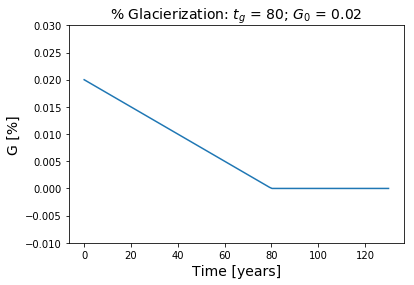

In [44]:
t_g = 80 
t_t = 20
t_e = 30
t_f = t_g + t_t + t_e
dt = 1
Nt_g = int(t_g / dt)
Nt_t = int(t_t / dt)
Nt_e = int(t_e / dt)
Nt = int(t_f / dt)
t = np.linspace(0, t_f, Nt-1)
fs = 14

G_0 = 0.02
G = G_0 * (1 - t/t_g)
G[G<0] = 0

fig, ax = plt.subplots()
ax.plot(t, G)
# ax.plot(dashx_g, dashy_g, 'k--')
# ax.plot(dashx_t, dashy_t, 'k--')
ax.set_xlabel('Time [years]', fontsize = fs)
ax.set_ylabel('G [%]', fontsize = fs)
ax.set_title('% Glacierization: $t_g$ = ' + str(t_g) + '; $G_0$ = ' + str(G_0), fontsize = fs)
ax.set_ylim((np.min(G) - 0.01, np.max(G)+0.01))

plt.show()

Let's simplify Figure a) to show the two regimes and discuss what we expect to happen.

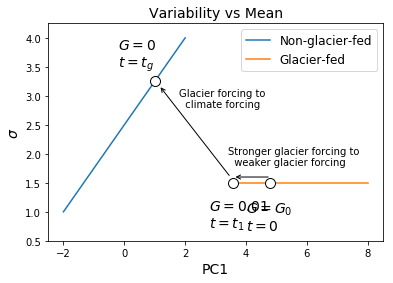

In [116]:
t_1 = t_g*(1 - 0.01/G_0)
Nt_1 = int(t_1 / dt)

PC1_0 = 11.6 + 1.74*np.log(G_0) #initial PC1
PC1_g = 11.6 + 1.74*np.log(0.01) #PC1 at 1% glacierization
PC1_f = 1 #final PC1

sigma_0 = 1.5 #initial sigma
sigma_g = sigma_0 #sigma at 1% glacierization
sigma_f = 2.5 + 0.75*PC1_f #final sigma

fs = 14

PC1_climate = np.linspace(-2,2,100)
sigma_climate = 2.5 + 0.75*PC1_climate

PC1_glaciers = np.linspace(PC1_g,8,100)
sigma_glaciers = 1.5 * np.ones_like(PC1_glaciers)

fig, ax = plt.subplots()

ax.plot(PC1_climate, sigma_climate, label = 'Non-glacier-fed')
ax.plot(PC1_glaciers, sigma_glaciers, label = 'Glacier-fed')

ax.scatter(PC1_0, sigma_0, s = 100, edgecolor = 'k', zorder = 3, facecolor = 'w')
ax.text(x = PC1_0-0.8, y = sigma_0 - 0.8, s = '$G=G_0$ \n$t=0$', fontsize = fs)

ax.scatter(PC1_g, sigma_g, s = 100, edgecolor = 'k', zorder = 3, facecolor = 'w')
ax.text(x = PC1_g-0.8, y = sigma_g - 0.8, s = '$G=0.01$ \n$t=t_1$', fontsize = fs)

ax.scatter(PC1_f, sigma_f, s = 100, edgecolor = 'k', zorder = 3, facecolor = 'w')
ax.text(x = PC1_f - 1.2, y = sigma_f + 0.2, s = '$G=0$ \n$t=t_g$', fontsize = fs)

ax.annotate("", xy = (PC1_g, sigma_g+0.1), xytext = (PC1_0, sigma_0+0.1), arrowprops = dict(arrowstyle="->"))
ax.annotate("", xy = (PC1_f+0.15, sigma_f-0.075), xytext = (PC1_g-0.1, sigma_g+0.1), arrowprops = dict(arrowstyle="->"))

ax.text(x = 3.4, y = 1.8, s = 'Stronger glacier forcing to \n  weaker glacier forcing', fontsize = fs-4)
ax.text(x = 1.8, y = 2.8, s = 'Glacier forcing to \n  climate forcing', fontsize = fs-4, rotation = 0)

ax.legend(fontsize = fs - 2)
ax.set_xlabel('PC1', fontsize = fs)
ax.set_ylabel('$\sigma$', fontsize = fs)
ax.set_title('Standard Deviation vs Mean', fontsize = fs)
ax.set_ylim((0.5, 4.25))

plt.show()

Between time $t=0$ and $t=t_1$, as the percentage glacierization decreases from $G(0) = G_0$ to $G(t_1)=0.01$, $\overline{PC_1}$ decreases according to Figure c):

$$
\overline{PC_1} = 11.58 + 1.74\times ln(G)
$$

During this time, $\sigma_{PC_1}$ stays approximately constant, as in Figure a).  Then, between time $t=t_1$ and $t=t_g$, as the percentage glacierization decreases from $G(t_1) = 0.01$ to $G(t_g)=0$, two things happen:

- $\overline{PC_1}$ transitions from:
    - $\overline{PC_1}(G = 0.01)$ $\rightarrow$ $\overline{PC_1}(T_{year}, P_{JJA}, T_{JJA}, E_{JJA}, log_{10}\big(\frac{Q_{min}}{Q_{max}}\big))$ 
    - i.e. $\overline{PC_1}$ transitions from being predictable by glacierization to being predictable by climate and local characteristics
    
- $\sigma_{PC_1}$ transitions from: 
    - $\sigma_{PC_1} = 1.5$ $\rightarrow$ $\sigma_{PC_1}(P_{JJA}, E_{JJA}, h, log_{10}\big(\frac{Q_{min}}{Q_{max}}\big))$ 
    - i.e. $\sigma_{PC_1}$ transitions from being roughly constant irrespective of glacierization to being predictable by climate and local characteristics
    
Since there is limited data detailing the form of this transition, let's assume that it is linear with time for both $\overline{PC_1}$ and $\sigma_{PC_1}$.

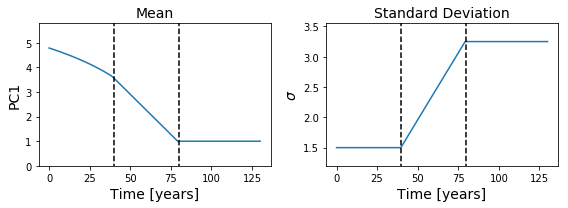

In [117]:
PC1 = np.zeros_like(t)
PC1[:Nt_1] = 11.6 + 1.74*np.log(G[:Nt_1])
PC1[Nt_1-1:Nt_g-1] = np.linspace(PC1_g, PC1_f, Nt_g-Nt_1)
PC1[Nt_g - 1:] = PC1_f

sigma = np.zeros_like(t)
sigma[:Nt_1] = np.linspace(sigma_0, sigma_g, Nt_1)
sigma[Nt_1-1:Nt_g-1] = np.linspace(sigma_g, sigma_f, Nt_g-Nt_1)
sigma[Nt_g-1:] = sigma_f

fs = 14

dashx_g = t_g * np.ones(10)
dashy_g = np.linspace(-10,10,10)
dashx_1 = (t_1) * np.ones(10)
dashy_1 = np.linspace(-10,10,10)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (8,3))

axes[0].plot(t,PC1)
axes[0].plot(dashx_g, dashy_g, 'k--')
axes[0].plot(dashx_1, dashy_1, 'k--')
axes[0].set_xlabel('Time [years]', fontsize = fs)
axes[0].set_ylabel('PC1', fontsize = fs)
axes[0].set_title('Mean', fontsize = fs)
axes[0].set_ylim((np.min(PC1) - 1, np.max(PC1)+1))

axes[1].plot(t, sigma)
axes[1].plot(dashx_g, dashy_g, 'k--')
axes[1].plot(dashx_1, dashy_1, 'k--')
axes[1].set_xlabel('Time [years]', fontsize = fs)
axes[1].set_ylabel('$\sigma$', fontsize = fs)
axes[1].set_title('Standard Deviation', fontsize = fs)
axes[1].set_ylim((np.min(sigma) - 0.3, np.max(sigma)+0.3))

fig.tight_layout()

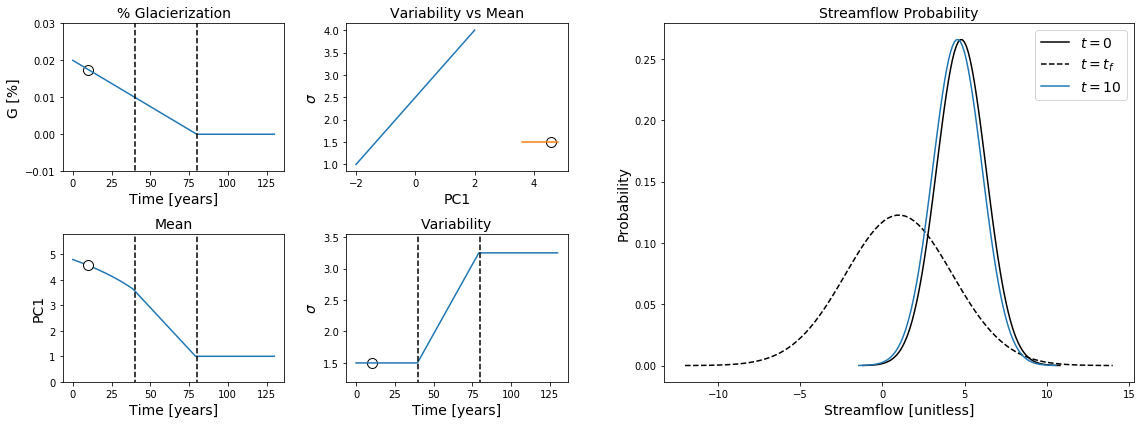

In [47]:
tt = 10

if tt < t_g:
    GG = G_0 * (1 - tt/t_g)
else:
    GG = 0
    
if GG > 0.01: #if glacier-forcing
    PP =  11.6 + 1.74*np.log(GG)
    ss = sigma_0
elif (GG<0.1) & (tt<(t_g + t_t)): #if transitioning from glacier-to-climate
    PP = PC1_g + (PC1_g - PC1_f)/t_t * tt
    ss = sigma_g + (sigma_f - sigma_g)/t_t * tt
else:
    PP = PC1_f
    ss = sigma_f
    


fs = 14

dashx_g = t_g * np.ones(10)
dashy_g = np.linspace(-10,10,10)
dashx_t = (t_g + t_t) * np.ones(10)
dashy_t = np.linspace(-10,10,10)

fig = plt.subplots(figsize = (16,6))

ax = plt.subplot(2, 4, 1)
ax.plot(t, G)
ax.plot(dashx_g, dashy_g, 'k--')
ax.plot(dashx_1, dashy_1, 'k--')
ax.scatter(tt, GG, s = 100, linewidth = 1, edgecolor = 'k', facecolor = 'w')
ax.set_xlabel('Time [years]', fontsize = fs)
ax.set_ylabel('G [%]', fontsize = fs)
ax.set_title('% Glacierization', fontsize = fs)
ax.set_ylim((np.min(G) - 0.01, np.max(G)+0.01))

ax = plt.subplot(2, 4, 2)
ax.plot(PC1_climate, sigma_climate)
ax.plot(PC1_glaciers, sigma_glaciers)
ax.scatter(PP, ss, s = 100, linewidth = 1, edgecolor = 'k', facecolor = 'w')
ax.set_xlabel('PC1', fontsize = fs)
ax.set_ylabel('$\sigma$', fontsize = fs)
ax.set_title('Variability vs Mean', fontsize = fs)

ax = plt.subplot(2, 4, 5)
ax.plot(t,PC1)
ax.plot(dashx_g, dashy_g, 'k--')
ax.plot(dashx_1, dashy_1, 'k--')
ax.scatter(tt, PP, s = 100, linewidth = 1, edgecolor = 'k', facecolor = 'w', zorder = 3)
ax.set_xlabel('Time [years]', fontsize = fs)
ax.set_ylabel('PC1', fontsize = fs)
ax.set_title('Mean', fontsize = fs)
ax.set_ylim((np.min(PC1) - 1, np.max(PC1)+1))

ax = plt.subplot(2, 4, 6)
ax.plot(t, sigma)
ax.plot(dashx_g, dashy_g, 'k--')
ax.plot(dashx_1, dashy_1, 'k--')
ax.scatter(tt, ss, s = 100, linewidth = 1, edgecolor = 'k', facecolor = 'w')
ax.set_xlabel('Time [years]', fontsize = fs)
ax.set_ylabel('$\sigma$', fontsize = fs)
ax.set_title('Variability', fontsize = fs)
ax.set_ylim((np.min(sigma) - 0.3, np.max(sigma)+0.3))

ax = plt.subplot(1, 2, 2)
gauss_0, x_0 = make_gaussian(mu = PC1_0, sigma = sigma_0)
gauss_f, x_f = make_gaussian(mu = PC1_f, sigma = sigma_f)
gauss, x = make_gaussian(mu = PP, sigma = ss)
ax.plot(x_0,gauss_0, 'k', label = '$t = 0$')
ax.plot(x_f,gauss_f, 'k--', label = '$t = t_f$')
ax.plot(x,gauss, label = '$t = $' + str(tt))
ax.set_xlabel('Streamflow [unitless]', fontsize = fs)
ax.set_ylabel('Probability', fontsize = fs)
ax.set_title('Streamflow Probability', fontsize = fs)
ax.legend(fontsize = fs)

plt.tight_layout()

In [48]:
gausses = []
xs = []
for t_step, PC1_step, sigma_step in zip(t, PC1, sigma):
    gauss, x = make_gaussian(mu = PC1_step, sigma = sigma_step)
    gausses.append(gauss)
    xs.append(x)
    
gausses = np.asarray(gausses)
xs = np.asarray(xs)

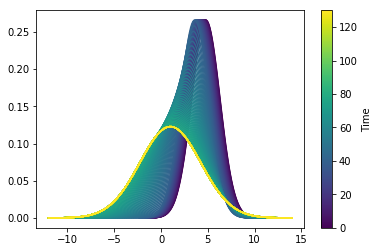

In [49]:
from matplotlib import colors
cmap = 'viridis'
norm = colors.Normalize(vmin=min(t),vmax=max(t))
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array([])

cs = cm.get_cmap(cmap, Nt-1) #colours

fig, ax = plt.subplots()
for ii, tt in enumerate(t):
    ax.plot(xs[ii],gausses[ii], color = cs(ii))
    
cb = fig.colorbar(mappable, ax = ax)
cb.set_label('Time')


In [118]:
#visualize time progression with a Widget!

slider_time = ipywidgets.FloatSlider(value = 0, min=0, max = t_f, description = 'Time', continuous_update=False)

@ipywidgets.interact(tt = slider_time)#, eigvecs = eigvecs, PCs = PCs)

def plot_things(tt):

    if tt < t_g:
        GG = G_0 * (1 - tt/t_g)
    else:
        GG = 0

    if GG >= 0.01: #if glacier-forcing
        PP =  11.6 + 1.74*np.log(GG)
        ss = sigma_0
    elif (GG<0.1) & (GG>0): #if transitioning from glacier-to-climate

        PC1_1 = 11.6 + 1.74*np.log(0.01)
        m = (PC1_f - PC1_g)/(t_g - t_1)
        b = PC1_g - m*t_1
        PP = m*tt+b

        m = (sigma_f - sigma_g)/(t_g - t_1)
        b = sigma_g - m*t_1
        ss = m*tt+b

    else:
        PP = PC1_f
        ss = sigma_f

    fs = 14

    dashx_g = t_g * np.ones(10)
    dashy_g = np.linspace(-10,10,10)
    dashx_t = (t_g + t_t) * np.ones(10)
    dashy_t = np.linspace(-10,10,10)

    fig = plt.subplots(figsize = (16,6))

    ax = plt.subplot(2, 4, 1)
    ax.plot(t, G)
    ax.plot(dashx_g, dashy_g, 'k--')
    ax.plot(dashx_1, dashy_1, 'k--')
    ax.scatter(tt, GG, s = 100, linewidth = 1, edgecolor = 'k', facecolor = 'w')
    ax.set_xlabel('Time [years]', fontsize = fs)
    ax.set_ylabel('G [%]', fontsize = fs)
    ax.set_title('% Glacierization', fontsize = fs)
    ax.set_ylim((np.min(G) - 0.01, np.max(G)+0.01))

    ax = plt.subplot(2, 4, 2)
    ax.plot(PC1_climate, sigma_climate)
    ax.plot(PC1_glaciers, sigma_glaciers)
    ax.scatter(PP, ss, s = 100, linewidth = 1, edgecolor = 'k', facecolor = 'w')
    ax.set_xlabel('PC1', fontsize = fs)
    ax.set_ylabel('$\sigma$', fontsize = fs)
    ax.set_title('Variability vs Mean', fontsize = fs)

    ax = plt.subplot(2, 4, 5)
    ax.plot(t,PC1)
    ax.plot(dashx_g, dashy_g, 'k--')
    ax.plot(dashx_1, dashy_1, 'k--')
    ax.scatter(tt, PP, s = 100, linewidth = 1, edgecolor = 'k', facecolor = 'w', zorder = 3)
    ax.set_xlabel('Time [years]', fontsize = fs)
    ax.set_ylabel('PC1', fontsize = fs)
    ax.set_title('Mean', fontsize = fs)
    ax.set_ylim((np.min(PC1) - 1, np.max(PC1)+1))

    ax = plt.subplot(2, 4, 6)
    ax.plot(t, sigma)
    ax.plot(dashx_g, dashy_g, 'k--')
    ax.plot(dashx_1, dashy_1, 'k--')
    ax.scatter(tt, ss, s = 100, linewidth = 1, edgecolor = 'k', facecolor = 'w')
    ax.set_xlabel('Time [years]', fontsize = fs)
    ax.set_ylabel('$\sigma$', fontsize = fs)
    ax.set_title('Standard Deviation', fontsize = fs)
    ax.set_ylim((np.min(sigma) - 0.3, np.max(sigma)+0.3))

    ax = plt.subplot(1, 2, 2)
    gauss_0, x_0 = make_gaussian(mu = PC1_0, sigma = sigma_0)
    gauss_f, x_f = make_gaussian(mu = PC1_f, sigma = sigma_f)
    gauss, x = make_gaussian(mu = PP, sigma = ss)
    ax.plot(x_0,gauss_0, 'k', label = '$t = 0$')
    ax.plot(x_f,gauss_f, 'k--', label = '$t = t_f$')
    ax.plot(x,gauss, label = '$t = $' + str(tt))
    ax.set_xlabel('Streamflow [unitless]', fontsize = fs)
    ax.set_ylabel('Probability', fontsize = fs)
    ax.set_title('Streamflow Probability', fontsize = fs)
    ax.legend(fontsize = fs)

    plt.tight_layout()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Time', max=130.0), Output()…

In [41]:
tt = 70.1
m = (sigma_f - sigma_g)/(t_g - t_1)
b = sigma_g - m*t_1
ss = m*tt+b
print(m, b, ss)

0.109375 -5.5 2.167187499999999


In [35]:
sigma_g, sigma_0, sigma_f

(1.5, 1.5, 3.25)

In [39]:
t_1,t_g, t_f

(64.0, 80, 130)

In [40]:
1.75*4

7.0

In [119]:
23333+263+1552+1698+11666+288

38800

In [120]:
3700*12

44400

### Questions we can ask:

- If we lose 90% of glacier area, how will rivers change?  What about 70%?  
- What percent of glacier area can we afford to lose before the year-to-year variability begins to substantially increase?
- Under what conditions might streamflow rise (however briefly) under a loss of glaciers?  What happens if the variability increases substantially, but the mean decreases slowly?  What pair of $(PC_1, \sigma_{PC_1})_{initial}$ and $(PC_1, \sigma_{PC_1})_{final}$ could lead to this?  Check out the map of Alberta where this type of $(PC_1, \sigma_{PC_1})_{final}$ exists.  What climate is this?  Are there glaciated places on Earth with this type of climate?
- If the transition from $G = 0.01$ to $G = 0$ happens relatively quickly, what might real mean August streamflow timeseries look like?